# 连续光谱图

导入 numpy 和 matplotlib 库。

In [62]:
import numpy as np
import matplotlib.pyplot as plt

定义一个函数，实现从波长（纳米）到 RGB 值的映射关系。

In [63]:
def wavelength_to_rgb(wavelength: float) -> tuple[int, int, int]:
    """
    将可见光波长（纳米）转换为一个近似的 (R, G, B) 元组。

    参数:
        wavelength (float): 波长，范围在 380nm 到 780nm 之间。

    返回:
        tuple[int, int, int]: 对应的 (R, G, B) 值，范围 0-255。
    """
    wl = float(wavelength)
    R, G, B = 0.0, 0.0, 0.0

    if 380 <= wl < 440:  # 紫色到蓝色
        R = -(wl - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 <= wl < 490: # 蓝色到青色
        R = 0.0
        G = (wl - 440) / (490 - 440)
        B = 1.0
    elif 490 <= wl < 510: # 青色到绿色
        R = 0.0
        G = 1.0
        B = -(wl - 510) / (510 - 490)
    elif 510 <= wl < 580: # 绿色到黄色
        R = (wl - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 <= wl < 645: # 黄色到红色
        R = 1.0
        G = -(wl - 645) / (645 - 580)
        B = 0.0
    elif 645 <= wl <= 780: # 红色
        R = 1.0
        G = 0.0
        B = 0.0
    
    # 亮度因子 (Factor)
    if 380 <= wl < 420:
        factor = 0.3 + 0.7 * (wl - 380) / (420 - 380)
    elif 420 <= wl < 645:
        factor = 1.0
    elif 645 <= wl <= 780:
        factor = 0.3 + 0.7 * (780 - wl) / (780 - 645)
    else:
        factor = 0.0

    R_out = int(max(0, min(255, R * factor * 255)))
    G_out = int(max(0, min(255, G * factor * 255)))
    B_out = int(max(0, min(255, B * factor * 255)))

    return (R_out, G_out, B_out)

创建一个函数，用于在 Jupyter Notebook 中绘制连续光谱图。

使用 imshow 函数绘制连续光谱图。

In [64]:
def draw_spectrum():
    """
    在 Jupyter Notebook 中绘制连续光谱图
    """

    # 1. 生成波长数据
    wavelengths = np.linspace(380, 780, 2000)

    # 2. 为每个波长生成 RGB 颜色
    # 转换为 0-1 范围的 RGB（matplotlib 需要）
    colors = np.array([wavelength_to_rgb(wl) for wl in wavelengths]) / 255.0

    # 3. 创建用于 plt.imshow 的图像数据
    color_image = colors.reshape(1, -1, 3)

    # 4. 使用 imshow 显示图像
    fig, ax = plt.subplots(figsize=(12, 2))

    ax.imshow(color_image, aspect='auto', extent=[380, 780, 0, 1])
    ax.set_xlabel('波长（纳米）')
    ax.set_title('连续光谱图')
    ax.set_xlim(380, 780)
    ax.set_yticks([])
    ax.set_xticks([380, 400, 450, 500, 550, 600, 650, 700, 750, 780])
    # 设置中文字体支持
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'Arial Unicode MS', 'sans-serif']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plt.show()
    

执行函数，绘制连续光谱图。

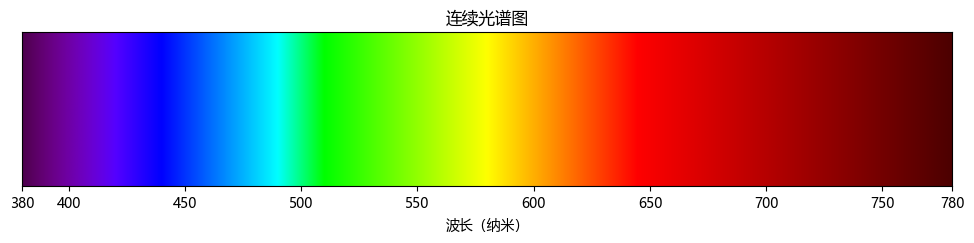

In [65]:
draw_spectrum()